<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/ndrcf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [ ]:
import numpy as np
from numpy import exp, sqrt

#### Plotting tools
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import pickle


def plot2d(data = None):
    """ Plot in plotly
    """
    fig = go.Figure()
    #fig.add_trace(go.Surface(x=x, y=y, z=z))
    if data is not None:
        fig.add_trace(go.Scatter3d(x=data[:,0], y=data[:,1], z=data[:,2], mode='markers'))

    fig.update_layout(title='Ground Truth Random-Contious 2d-Function', autosize=True, width=800, height=800, margin=dict(l=65, r=50, b=65, t=90))
    fig.show()

def K(X, Y, ξ=10):
    """
    compute kernel function (RBF) between two domain points

    R_iax = X_ix - Y_ax
    Σ     = exp( - sum( R_iax**2 , over=x) / ξ )

    INPUT  : X (X data)
             Y (Y data)
             ξ (correlation length)
    RETURN : Σ
    """
    if X.ndim==1:
        X=X.reshape(-1,1)
    if Y.ndim==1:
        Y=Y.reshape(-1,1)
    return np.exp( - np.sum( (X[None, :] - Y[:, None])**2 , axis=2) / ξ )

def nK(R_ix, ξ=10):
    """
    compute kernel function (RBF) between two domain points

    R_iax = X_ix - Y_ax
    Σ     = exp( - sum( R_iax**2 , over=x) / ξ )

    INPUT  : X (X data)
             Y (Y data)
             ξ (correlation length)
    RETURN : Σ
    """
    R_ij = np.linalg.norm(R_ix[:, None, :] - R_ix[None, :, :], axis=2)
    return np.exp( - R_ij**2 / ξ )

def ndrcf(domain, dr_x, μ_i=None, MOut=1):
    """
    IN:
        domain : 2d-numpy.ndarray, gives ranges for each coordinate (coordinate-index 'x', 2), e.g. [[x0_min, x0_max], [x1_min, x1_max]]
        dr_x : the spacing for each dimension (has coordinate-index 'x')
        μ_i : mean along each point (points-index 'i')
    OUT:
        F_ix : 2d-numpy.ndarray (points-index, coordinate-index)

    **this should be made into an object where we save Σ_ij,
    perferbly as Σ_ij = L_ik L_kj (ie Cholesky-decomposition), save L_ij (lower-triangular-matrix)
    such that we may ask for additional points.
    """

    R_ix = np.stack(np.meshgrid(*[ np.arange(domain[i,0], domain[i,1], dr_x[i]) for i in range(len(dr_x)) ]), axis=-1)
    R_ix = R_ix.reshape((np.prod( R_ix.shape[:-1] ), R_ix.shape[-1])) ### x input

    μ_i  = np.zeros(R_ix.shape[0])
    Σ_ij = nK(R_ix)

    D_iy  = np.random.multivariate_normal(μ_i, Σ_ij, MOut).T ### y output, #1 is the number of functions/surfaces (? for MIMO 1=# of Outs??)
    return np.concatenate( (R_ix, D_iy) , axis=1)

def ndrcfM(domain, dr_x, μ_i=None, MOut=1):
    """
    IN:
        domain : 2d-numpy.ndarray, gives ranges for each coordinate (coordinate-index 'x', 2), e.g. [[x0_min, x0_max], [x1_min, x1_max]]
        dr_x : the spacing for each dimension (has coordinate-index 'x')
        μ_i : mean along each point (points-index 'i')
    OUT:
        F_ix : 2d-numpy.ndarray (points-index, coordinate-index)

    **this should be made into an object where we save Σ_ij,
    perferbly as Σ_ij = L_ik L_kj (ie Cholesky-decomposition), save L_ij (lower-triangular-matrix)
    such that we may ask for additional points.
    """

    R_ix = np.stack(np.meshgrid(*[ np.arange(domain[i,0], domain[i,1], dr_x[i]) for i in range(len(dr_x)) ]), axis=-1)
    R_ix = R_ix.reshape((np.prod( R_ix.shape[:-1] ), R_ix.shape[-1])) ### x input

    μ_i  = np.zeros(R_ix.shape[0])
    Σ_ij = nK(R_ix)

    D_iy  = np.random.multivariate_normal(μ_i, Σ_ij, MOut).T ### y output, #1 is the number of functions/surfaces (? for MIMO 1=# of Outs??)
    return np.concatenate( (R_ix, D_iy) , axis=1)

### make into function....

##### READ and WRITE gpCAM data
def WRITE(list_of_data, filename="data.pkl"):
    """ requires to import pickle
    GIVEN :     list_of_data : List[dic]
                *filename : str (filename to store 'list_of_data'-variable)
    GET :       None (produced file)
    """

    with open(filename, "wb") as file:
        pickle.dump(list_of_data, file)
    file.close()

    return None

def READ(filename="data.pkl"):
    """ requires to import pickle
    GIVEN :     *filename : str (filename to read 'list_of_data'-variable)
    GET :       OUT : List[dic] (List[dic], ie the data)
    """

    with open(filename, "rb") as file:
        OUT = pickle.load(file)
    file.close()

    return OUT

# input parameters

In [ ]:
S    = 200 ## Number of Data Points
μ    = 0. ## Mean for all Data
ξ    = 15 ## correlation-length in covaraince matrix (sq of actual correlation-length ?)
show = 1 ## show these many samples

# 1d random-continous-function

(17, 2)


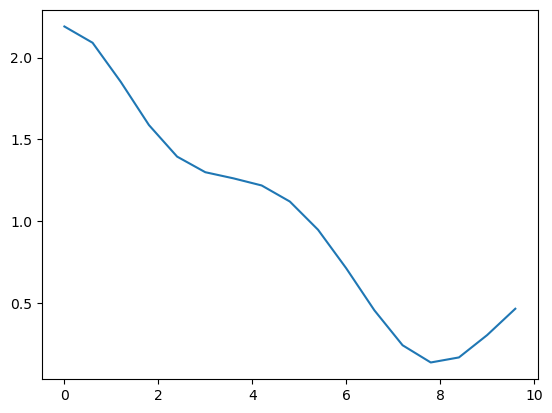

In [ ]:
dr_x   = np.array([0.6])
domain = np.array([[ 0.0, 10.0]])

f = ndrcf(domain, dr_x, μ_i=None)
print(f.shape)
plt.plot(f[:,0], f[:,1])
plt.show()

# 2d random-continous-function

In [ ]:
dr_x   = np.array([0.6, 0.5])
domain = np.array([[ 0.0, 10.0],
                   [-5.0,  7.0]])

f = ndrcf(domain, dr_x, μ_i=None)
print(f.shape)

plot2d(data = f)

(408, 3)


In [ ]:
##MIMO?
f = ndrcfM(domain, dr_x, MOut=15)
f[:10,:].T

array([[ 0.        ,  0.6       ,  1.2       ,  1.8       ,  2.4       ,
         3.        ,  3.6       ,  4.2       ,  4.8       ,  5.4       ],
       [-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ],
       [ 1.14586689,  0.58385108,  0.15420747, -0.05177632, -0.04992958,
         0.05993442,  0.16830483,  0.22233809,  0.23954084,  0.27032902],
       [-0.44156482, -0.37999843, -0.11382257,  0.31536575,  0.80191612,
         1.20783784,  1.40373149,  1.31380845,  0.94771732,  0.39634448],
       [ 0.42292636,  0.42123998,  0.43295409,  0.47962474,  0.56578795,
         0.65428413,  0.69229449,  0.66324826,  0.60672863,  0.58367134],
       [ 0.91256427,  0.52899695,  0.4530787 ,  0.70080449,  1.17661252,
         1.72575346,  2.20821215,  2.55091846,  2.75038737,  2.83307331],
       [ 0.52456084,  0.31034729,  0.02128814, -0.246321  , -0.42558387,
        -0.50353855, -0.51196802, -0.50255738

# 3d random-continous-function

In [ ]:
dr_x   = np.array([0.8, 0.9, 0.2])
domain = np.array([[ 0.0, 10.0],
                   [-5.0,  7.0],
                   [ 2.0,  8.0]])

f = ndrcf(domain, dr_x, μ_i=None)
print(f.shape)

(5460, 4)


# 7d random-continous-function

In [ ]:
dr_x   = np.array([1.2, 1.75, 1.2, 2.4, 0.6, 0.8, 0.40])
domain = np.array([[ 0.0, 10.0],
                   [-5.0,  7.0],
                   [ 2.0,  4.0],
                   [ 2.0,  4.0],
                   [ 1.0,  3.0],
                   [11.0, 13.0],
                   [ 5.0,  6.0]])

f = ndrcf(domain, dr_x, μ_i=None)
print(f.shape)

(4536, 8)


# Let's now consider a grid/random-sampling of points within a domain:

In [ ]:
domain = np.array([[ 0.0, 10.0],
                   [-5.0,  7.0],
                   [ 2.0,  8.0]])
N = 100

###################
###################
###################
Rgrid_ix = np.asarray([np.linspace(element[0], element[1], N) for element in domain]).T
Rrand_ix = np.asarray([(element[1]-element[0])*np.random.rand(N) + element[0] for element in domain]).T

In [ ]:
dr_x   = np.array([0.6, 0.5])
domain = np.array([[ 0.0, 10.0],
                   [-5.0,  7.0]])
ndrcfM(domain, dr_x, MOut=10)

class mimo_function:

    ### define default

    def __init__(self, domain, dr_x, μ_i=None, MOut=1):
        self.domain = domain
        self.dr_x   = dr_x
        self.μ_i    = μ_i

        self.data_points = self.ndrcfM(domain, dr_x, μ_i=None, MOut=1)

    def ndrcfM(domain, dr_x, μ_i=None, MOut=1):
        """
        IN:
            domain : 2d-numpy.ndarray, gives ranges for each coordinate (coordinate-index 'x', 2), e.g. [[x0_min, x0_max], [x1_min, x1_max]]
            dr_x : the spacing for each dimension (has coordinate-index 'x')
            μ_i : mean along each point (points-index 'i')
        OUT:
            F_ix : 2d-numpy.ndarray (points-index, coordinate-index)

        **this should be made into an object where we save Σ_ij,
        perferbly as Σ_ij = L_ik L_kj (ie Cholesky-decomposition), save L_ij (lower-triangular-matrix)
        such that we may ask for additional points.
        """

        R_ix = np.stack(np.meshgrid(*[ np.arange(domain[i,0], domain[i,1], dr_x[i]) for i in range(len(dr_x)) ]), axis=-1)
        R_ix = R_ix.reshape((np.prod( R_ix.shape[:-1] ), R_ix.shape[-1])) ### x input

        μ_i  = np.zeros(R_ix.shape[0])
        Σ_ij = nK(R_ix)

        D_iy  = np.random.multivariate_normal(μ_i, Σ_ij, MOut).T ### y output, #1 is the number of functions/surfaces (? for MIMO 1=# of Outs??)
        return np.concatenate( (R_ix, D_iy) , axis=1)

    def evaluate():
        return None

    def evaluateGP():
        return None


array([[ 0.        , -5.        ,  0.13105107, ..., -0.82955666,
         1.31685984, -0.16944204],
       [ 0.6       , -5.        ,  0.7401476 , ..., -0.95617714,
         1.25652475, -0.209215  ],
       [ 1.2       , -5.        ,  1.31145787, ..., -1.04278912,
         0.90363406, -0.11645699],
       ...,
       [ 8.4       ,  6.5       , -0.46487324, ..., -0.67573694,
        -1.86872373, -0.36737969],
       [ 9.        ,  6.5       , -0.24595795, ..., -0.68209722,
        -2.21416201, -0.50192909],
       [ 9.6       ,  6.5       , -0.21120115, ..., -0.50422926,
        -2.52905206, -0.58352283]])

## Let's consider the old functions write to text files

In [ ]:
from numpy import sin, exp

def function1(p0, p1):
    """
    bivariate function of p0 & p1 with domain:
    Domain = np.array([[ 0.0, 50.0],
                       [ 0.0, 50.0]])
    """
    if p0 >= 30:
        return 8 - ( 2*p0*sin( sqrt( abs(p0) )) + 2*p1*sin( sqrt( abs(p1) ) )) + 140
    else:
        if sqrt( p0**2 + p1**2 ) >= 20:
            return 8 - ( 2*p0*sin( sqrt( abs(p0) )) + 2*p1*sin( sqrt( abs(p1) ) )) + 160
        else:
            return 8 - ( 2*p0*sin( sqrt( abs(p0) )) + 2*p1*sin( sqrt( abs(p1) ) ))

def function2(p0, p1):
    """
    bivariate function of p0 & p1 with domain:
    Domain = np.array([[ -10.0, 10.0],
                       [  10.0, 10.0]])
    """
    return sin( 2*p0 ) + sin( 2*p1 ) + (p0/5)**2 - (p1/5)**2

def function3(p0, p1):
    """
    bivariate function of p0 & p1 with domain:
    Domain = np.array([[ 0.0, 50.0],
                       [ 0.0, 50.0]])
    """
    if p0 > 21.961143:
        return (25/17) * (p0 - 5) + 14
    else: ## p0 <= 21.961143
        if p1 > 25:
            return -(25/18) * (p0 - 50) + 50
        else: ## p1 <= 25
            return -(25/18) * (p0 - 50)


dic = {"function1":function1, "function2":function2, "function3":function3 }

### make intruments

In [ ]:
def instrument1(data):
    """
    data is a List[ dic ], hence labelled-data
    """
    for entry in data:
        entry["y_data"] = dic["function1"](entry["x_data"][0], entry["x_data"][1])
        entry["cost"]  = [np.array([0,0]),entry["x_data"],np.sum(entry["x_data"])]
    return data

In [ ]:
list_of_data = [{'x_data': np.array([3.04986762, 4.66446892]),
  'y_data': -0.6519311743614136,
  'noise variance': None,
  'cost': [np.array([0, 0]), np.array([3.04986762, 4.66446892]), 7.714336536446131],
  'id': '3b115847-cbe5-4c19-b2c9-0004455f8a52',
  'time stamp': 1705512086.8447511,
  'date time': '17/01/2024_11:21:26',
  'measured': False},
 {'x_data': np.array([1.07469298, 6.04996553]),
  'y_data': -0.13806646827231991,
  'noise variance': None,
  'cost': [np.array([0, 0]), np.array([1.07469298, 6.04996553]), 7.124658510619914],
  'id': 'e343a7e8-b133-415e-a69f-6768438e6934',
  'time stamp': 1705512086.844794,
  'date time': '17/01/2024_11:21:26',
  'measured': False},
 {'x_data': np.array([4.54385235, 6.1862373 ]),
  'y_data': 0.9841470549061848,
  'noise variance': None,
  'cost': [np.array([0, 0]), np.array([4.54385235, 6.1862373 ]), 10.730089647376804],
  'id': '1e7a8bc2-9e1e-4f92-b5e0-f8205b63f259',
  'time stamp': 1705512086.844807,
  'date time': '17/01/2024_11:21:26',
  'measured': False},
 {'x_data': np.array([0.36948575, 7.26536243])}]

### example of the Write & Read
WRITE(list_of_data, filename="data.pkl")
OUT = READ(filename="data.pkl")
OUT[1]["y_data"], type( OUT[2]["x_data"] )

(-0.13806646827231991, numpy.ndarray)